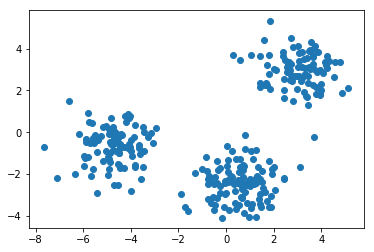

In [2]:
import pandas as pd
pointsdf = pd.read_csv("/cxldata/mltut/points.csv");

import numpy as np
points = np.array(pointsdf)

xs = points[:, 0]
ys  = points[:, 1]

import matplotlib.pyplot as plt
plt.scatter(xs, ys)


In [3]:
from sklearn.cluster import KMeans
model = KMeans( n_clusters=3)  
t=model.fit(points)
clusters = model.fit_predict(points)
clusters
new_points = [[4,3],[4,1],[-5,1]]
j = model.predict(new_points)
print(j)

[0 0 1]


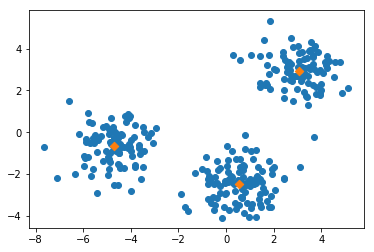

Using Dataset
https://archive.ics.uci.edu/ml/datasets/seeds

## How many clusters of grain?

In [20]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt

--2019-02-08 13:47:38--  https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9300 (9.1K) [text/plain]
Saving to: ‘seeds_dataset.txt’

100%[======================================>] 9,300       --.-K/s   in 0s      

2019-02-08 13:47:38 (175 MB/s) - ‘seeds_dataset.txt’ saved [9300/9300]



In [21]:
!tail seeds_dataset.txt

12.38	13.44	0.8609	5.219	2.989	5.472	5.045	3
12.67	13.32	0.8977	4.984	3.135	2.3		4.745	3
11.18	12.72	0.868	5.009	2.81	4.051	4.828	3
12.7	13.41	0.8874	5.183	3.091	8.456	5		3
12.37	13.47	0.8567	5.204	2.96	3.919	5.001	3
12.19	13.2	0.8783	5.137	2.981	3.631	4.87	3
11.23	12.88	0.8511	5.14	2.795	4.325	5.003	3
13.2	13.66	0.8883	5.236	3.232	8.315	5.056	3
11.84	13.21	0.8521	5.175	2.836	3.598	5.044	3
12.3	13.34	0.8684	5.243	2.974	5.637	5.063	3

In [40]:
data = np.fromfile("seeds_dataset.txt", sep="\t")

In [41]:
data

array([15.26 , 14.84 ,  0.871, ...,  5.637,  5.063,  3.   ])

In [42]:
data = data.reshape(-1, 8)

In [43]:
data.shape

(210, 8)

In [44]:
data[0]

array([15.26 , 14.84 ,  0.871,  5.763,  3.312,  2.221,  5.22 ,  1.   ])

In [46]:
samples = data[:, 0:7]

In [47]:
samples.shape

(210, 7)

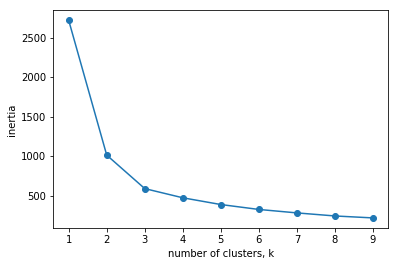

In [51]:
ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


## Using Cross Tab

In [56]:

samples = data[:, 0:7]
varieties = data[:, 7]

# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties  1.0  2.0  3.0
labels                  
0           60   10    2
1            1   60    0
2            9    0   68


In [58]:
ct

varieties,1.0,2.0,3.0
labels,,,
0,60,10,2
1,1,60,0
2,9,0,68


## Try shuffling the data

In [61]:
np.random.shuffle(data)


In [60]:

samples = data[:, 0:7]
varieties = data[:, 7]

# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties  1.0  2.0  3.0
labels                  
0            9    0   68
1            1   60    0
2           60   10    2


## Wines Dataset

In [62]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

--2019-02-08 14:14:51--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10782 (11K) [text/plain]
Saving to: ‘wine.data’

100%[======================================>] 10,782      --.-K/s   in 0s      

2019-02-08 14:14:52 (176 MB/s) - ‘wine.data’ saved [10782/10782]



In [113]:
!tail wine.data

3,13.58,2.58,2.69,24.5,105,1.55,.84,.39,1.54,8.66,.74,1.8,750
3,13.4,4.6,2.86,25,112,1.98,.96,.27,1.11,8.5,.67,1.92,630
3,12.2,3.03,2.32,19,96,1.25,.49,.4,.73,5.5,.66,1.83,510
3,12.77,2.39,2.28,19.5,86,1.39,.51,.48,.64,9.899999,.57,1.63,470
3,14.16,2.51,2.48,20,91,1.68,.7,.44,1.24,9.7,.62,1.71,660
3,13.71,5.65,2.45,20.5,95,1.68,.61,.52,1.06,7.7,.64,1.74,740
3,13.4,3.91,2.48,23,102,1.8,.75,.43,1.41,7.3,.7,1.56,750
3,13.27,4.28,2.26,20,120,1.59,.69,.43,1.35,10.2,.59,1.56,835
3,13.17,2.59,2.37,20,120,1.65,.68,.53,1.46,9.3,.6,1.62,840
3,14.13,4.1,2.74,24.5,96,2.05,.76,.56,1.35,9.2,.61,1.6,560


In [96]:
!wc -l wine.data

178 wine.data


In [133]:
import numpy as np

winedf = pd.read_csv("wine.data");
winedata = np.array(winedf)



In [134]:
winedata.shape

(177, 14)

In [135]:
X = winedata[:, 1:14]

In [136]:
y = winedata[:, 0]

In [138]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(X)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': y})

# Create crosstab: ct
ct_unscaled = pd.crosstab(df['labels'], df['varieties'])

# Display ct
ct_unscaled

varieties,1.0,2.0,3.0
labels,,,
0,0,50,19
1,45,1,0
2,13,20,29


In [127]:
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [139]:
import sklearn


In [140]:
from sklearn.preprocessing import StandardScaler

In [141]:
scaler = StandardScaler()

In [142]:
X_scaled = scaler.fit_transform(X)

In [143]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(X_scaled)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': y})

# Create crosstab: ct
ct_scaled = pd.crosstab(df['labels'], df['varieties'])

# Display ct
ct_scaled

varieties,1.0,2.0,3.0
labels,,,
0,0,3,48
1,58,3,0
2,0,65,0


In [144]:
ct_unscaled

varieties,1.0,2.0,3.0
labels,,,
0,0,50,19
1,45,1,0
2,13,20,29


In [145]:
pd.DataFrame(X_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02
mean,-2.609338e-16,4.252719e-16,-4.378168e-16,-6.410440e-16,-1.028681e-16,-1.279579e-16,1.505387e-16,-5.595022e-16,5.645202e-17,1.568112e-16,6.310081e-16,6.335171e-16,2.389802e-16
std,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00
min,-2.434746e+00,-1.433400e+00,-3.668064e+00,-2.680472e+00,-2.093373e+00,-2.100648e+00,-1.690491e+00,-1.868993e+00,-2.065084e+00,-1.628565e+00,-2.087573e+00,-1.897707e+00,-1.487599e+00
25%,-7.856866e-01,-6.628933e-01,-5.692924e-01,-6.964846e-01,-8.198411e-01,-8.840502e-01,-8.268924e-01,-7.426883e-01,-5.912136e-01,-7.959038e-01,-7.745875e-01,-9.590184e-01,-7.805774e-01
50%,6.984037e-02,-4.209899e-01,-2.245039e-02,-5.094986e-03,-1.123234e-01,9.242960e-02,1.069996e-01,-1.795360e-01,-6.483128e-02,-1.617011e-01,1.320404e-02,2.498992e-01,-2.327949e-01
75%,8.385748e-01,6.810145e-01,7.066723e-01,5.961134e-01,5.244425e-01,8.127835e-01,8.400546e-01,6.249672e-01,6.370119e-01,4.940731e-01,7.134631e-01,8.045791e-01,7.640417e-01
max,2.276852e+00,3.100048e+00,3.149233e+00,3.151249e+00,4.415790e+00,2.541633e+00,3.069345e+00,2.394874e+00,3.497023e+00,3.427800e+00,3.295669e+00,1.985052e+00,2.977465e+00
